# Tour & Travels Customer Churn Prediction

## Import Package/Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data Wrangling
### Gathering Data

In [2]:
customertravel_df = pd.read_csv("Tour_Travels_Customer_Churn_Prediction/Customertravel.csv")
customertravel_df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


### Assessing Data

In [3]:
customertravel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


There are no anomalies in the amount of data and data types.

In [4]:
customertravel_df.nunique()

Age                           11
FrequentFlyer                  3
AnnualIncomeClass              3
ServicesOpted                  6
AccountSyncedToSocialMedia     2
BookedHotelOrNot               2
Target                         2
dtype: int64

In [5]:
customertravel_df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

There are no missing values.

In [6]:
customertravel_df.shape

(954, 7)

In [7]:
customertravel_df.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


In [8]:
print("Number of duplicates: ", customertravel_df.duplicated().sum())

Number of duplicates 507


There is no identification for each customer which leads to duplicate data.

In [9]:
customertravel_df["customer"] = ["customer" + str(i) for i in range(1, len(customertravel_df) + 1)]
customertravel_df.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,customer
949,31,Yes,Low Income,1,No,No,0,customer950
950,30,No,Middle Income,5,No,Yes,0,customer951
951,37,No,Middle Income,4,No,No,0,customer952
952,30,No,Low Income,1,Yes,Yes,0,customer953
953,31,Yes,High Income,1,No,No,0,customer954


In [10]:
print("Number of duplicates: ", customertravel_df.duplicated().sum())

Number of duplicates 0


In [11]:
customertravel_df.describe(include='all')

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,customer
count,954.000000,954,954,954.000000,954,954,954.000000,954
unique,NaN,3,3,NaN,2,2,NaN,954
top,NaN,No,Middle Income,NaN,No,No,NaN,customer954
freq,NaN,608,409,NaN,594,576,NaN,1
mean,32.109015,NaN,NaN,2.437107,NaN,NaN,0.234801,NaN
std,3.337388,NaN,NaN,1.606233,NaN,NaN,0.424097,NaN
min,27.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN
25%,30.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN
50%,31.000000,NaN,NaN,2.000000,NaN,NaN,0.000000,NaN
75%,35.000000,NaN,NaN,4.000000,NaN,NaN,0.000000,NaN


## Exploratory Data Analysis (EDA)

In [12]:
customertravel_df.sample(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,customer
880,30,No,Low Income,1,No,Yes,0,customer881
353,34,Yes,High Income,1,No,No,0,customer354
920,35,No,Middle Income,3,No,Yes,0,customer921
109,27,Yes,Low Income,1,Yes,No,1,customer110
63,29,No,Middle Income,2,No,No,0,customer64


In [13]:
annual_income_class = customertravel_df.groupby(by="AnnualIncomeClass").size().reset_index(name="count").sort_values(by="count",ascending=False)
annual_income_class

,AnnualIncomeClass,count
2,Middle Income,409
1,Low Income,386
0,High Income,159


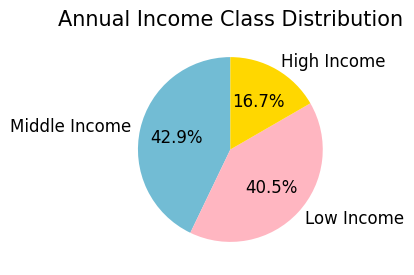

In [14]:
plt.figure(figsize=(3, 3))
colors = ["#72BCD4", "#FFB6C1", "#FFD700"]
sizes = annual_income_class["count"]
plt.pie(
    sizes, 
    labels = annual_income_class["AnnualIncomeClass"], 
    autopct = '%1.1f%%', 
    startangle = 90, 
    colors = colors, 
    textprops = {'fontsize': 12}
)
plt.title("Annual Income Class Distribution", fontsize=15, loc="center")
plt.show()

In [15]:
account_synced = customertravel_df.groupby(by="AccountSyncedToSocialMedia").size().reset_index(name="count").sort_values(by="count",ascending=False)
account_synced

,AccountSyncedToSocialMedia,count
0,No,594
1,Yes,360


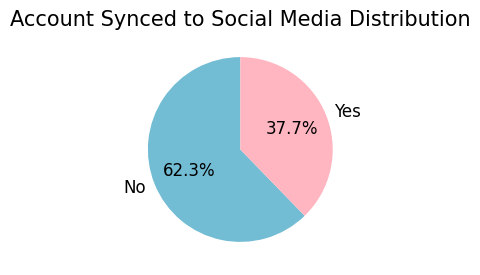

In [16]:
plt.figure(figsize=(3, 3))
colors = ["#72BCD4", "#FFB6C1", "#FFD700"]
sizes = account_synced["count"]
plt.pie(
    sizes, 
    labels = account_synced["AccountSyncedToSocialMedia"], 
    autopct = '%1.1f%%', 
    startangle = 90, 
    colors = colors, 
    textprops = {'fontsize': 12}
)
plt.title("Account Synced to Social Media Distribution", fontsize=15, loc="center")
plt.show()

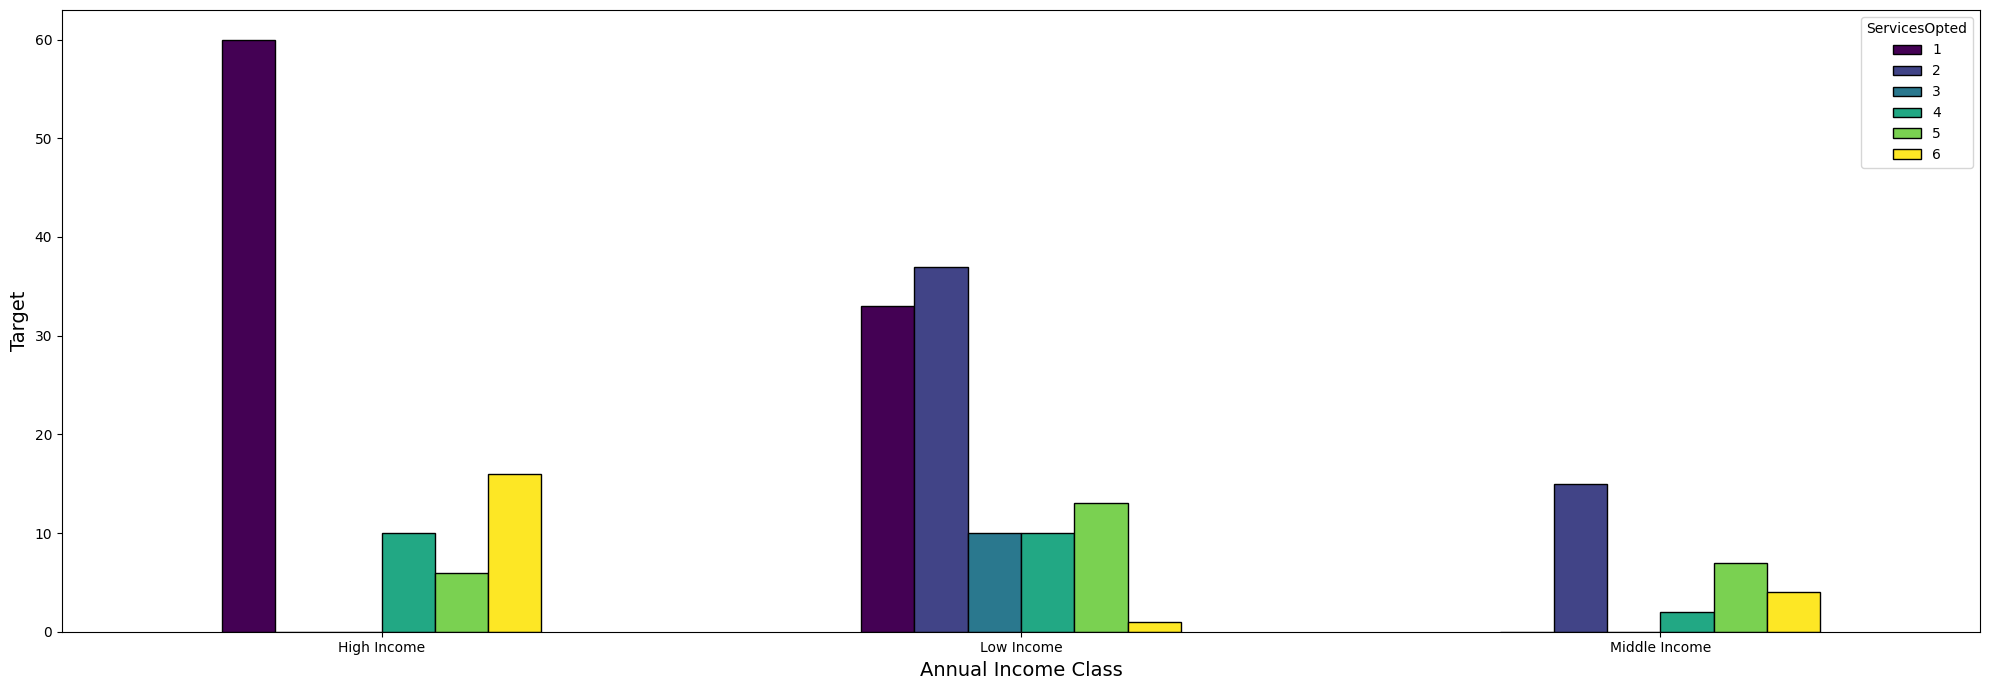

In [17]:
churn_target = customertravel_df[customertravel_df["Target"] == 1].groupby(["AnnualIncomeClass", "ServicesOpted"]).size().unstack()

plt.figure(figsize=(20, 7))
churn_target.plot(kind='bar', ax=plt.gca(), colormap='viridis', edgecolor='black')

plt.xlabel("Annual Income Class", fontsize=14)
plt.ylabel("Target", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="ServicesOpted")
plt.tight_layout()

plt.show()

In [18]:
target = customertravel_df.groupby(by="Target").size().reset_index(name="count").sort_values(by="count",ascending=False)
target

,Target,count
0,0,730
1,1,224


In [19]:
# Churn rate
churn_rate = customertravel_df['Target'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 23.48%


23.48% of total customers have stopped using the service.

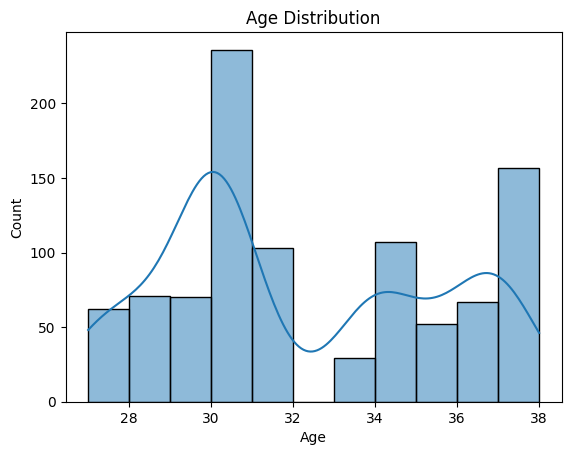

In [20]:
# Distribution of Age
sns.histplot(customertravel_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

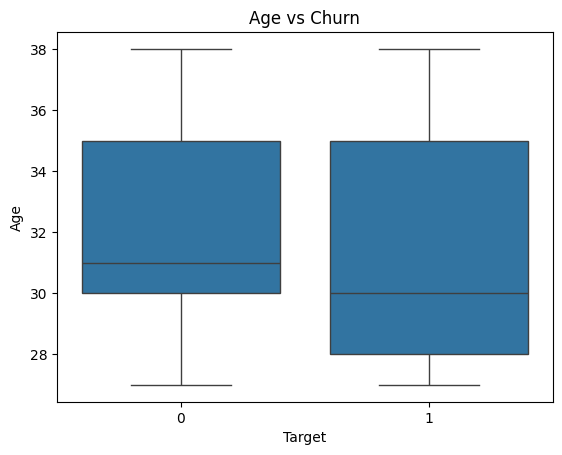

In [21]:
sns.boxplot(data=customertravel_df, x='Target', y='Age')
plt.title("Age vs Churn")
plt.show()

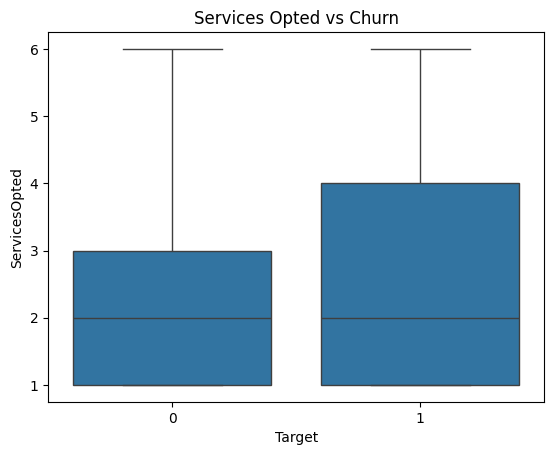

In [22]:
# Services Opted vs Target
sns.boxplot(x='Target', y='ServicesOpted', data=customertravel_df)
plt.title('Services Opted vs Churn')
plt.show()

In [23]:
# Features and target
X = customertravel_df.drop(columns=['Target', 'customer'])
y = customertravel_df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
print(X.dtypes)

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
dtype: object


In [25]:
# Convert remaining non-numeric columns to numeric using one-hot encoding or mapping
categorical_columns = ['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Double-check if all columns are now numeric
print(X.head())

   Age  ServicesOpted  FrequentFlyer_No Record  FrequentFlyer_Yes  \
0   34              6                    False              False   
1   34              5                    False               True   
2   37              3                    False              False   
3   30              2                    False              False   
4   30              1                    False              False   

   AnnualIncomeClass_Low Income  AnnualIncomeClass_Middle Income  \
0                         False                             True   
1                          True                            False   
2                         False                             True   
3                         False                             True   
4                          True                            False   

   AccountSyncedToSocialMedia_Yes  BookedHotelOrNot_Yes  
0                           False                  True  
1                            True                 False  
2 

In [26]:
# Train-test split (no changes needed here if X is fixed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[207  12]
 [ 23  45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       219
           1       0.79      0.66      0.72        68

    accuracy                           0.88       287
   macro avg       0.84      0.80      0.82       287
weighted avg       0.87      0.88      0.87       287


Accuracy Score: 0.8780487804878049


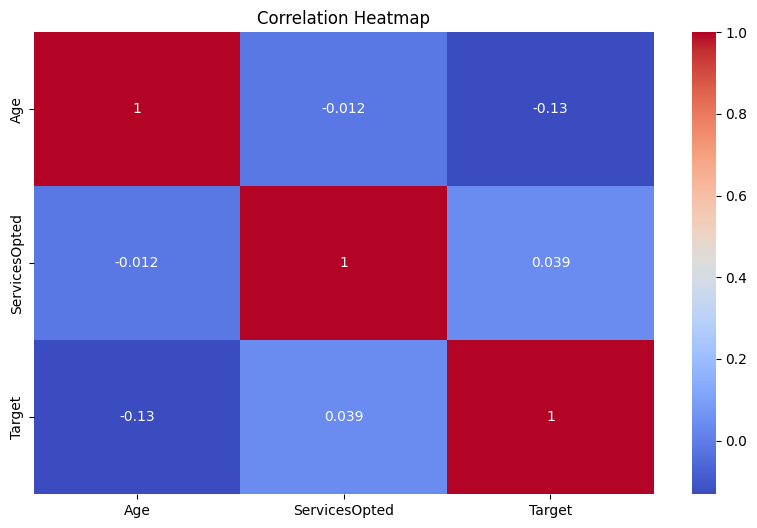

In [27]:
# Correlation heatmap
numerical_columns = customertravel_df.select_dtypes(include=['number']).columns
correlation_matrix = customertravel_df[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
le = LabelEncoder()
customertravel_df['FrequentFlyer'] = le.fit_transform(customertravel_df['FrequentFlyer'])
customertravel_df['AnnualIncomeClass'] = le.fit_transform(customertravel_df['AnnualIncomeClass'])
customertravel_df['AccountSyncedToSocialMedia'] = le.fit_transform(customertravel_df['AccountSyncedToSocialMedia'])
customertravel_df['BookedHotelOrNot'] = le.fit_transform(customertravel_df['BookedHotelOrNot'])
customertravel_df['customer'] = le.fit_transform(customertravel_df['customer'])

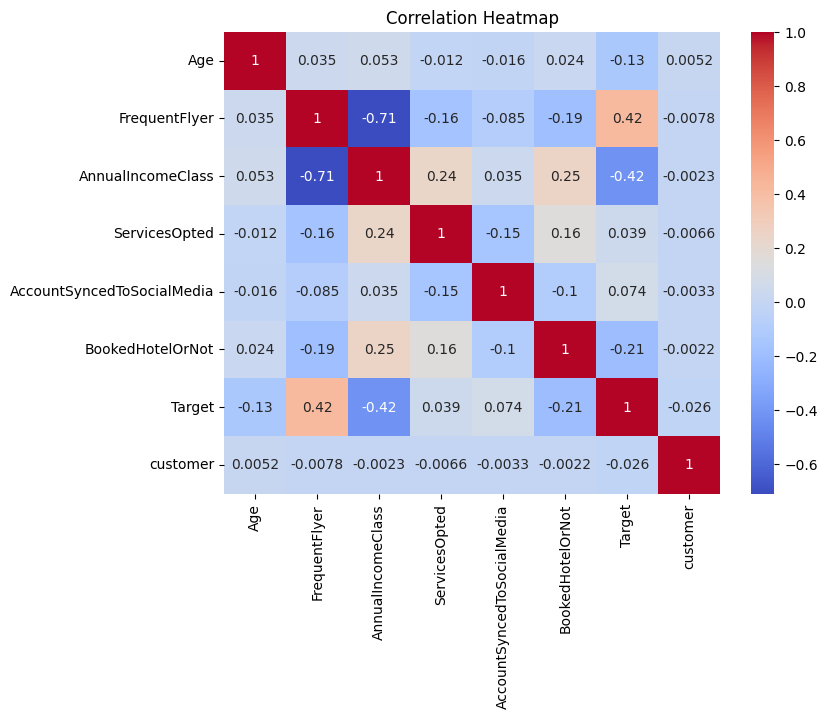

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(customertravel_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()